# 00_1_Open_Exploration_Levers

**File Description**
This file conducts open exploration across the levers given a baseline scenario. The baseline scenario is defined as the average of the range for each uncertainty.

**Set up run parameters, import key packages, define model**

In [7]:
policies = pow(2,9) #=512
pf_id = 2 #problem formulation id

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import Scenario

ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(pf_id)

In [4]:
import copy
uncertainties = copy.deepcopy(dike_model.levers)
levers = copy.deepcopy(dike_model.levers)

**Define baseline scenario**
baseline scenario is the average of the range for each uncertainty

In [5]:
scenarios = [Scenario('scenario 1', **{'discount rate 0':3,
                                       'discount rate 1':3,
                                       'discount rate 2':3,
                                       'A.1_Bmax' : 190,
                                       'A.1_Brate':1.5,
                                       'A.1_pfail':0.5,
                                       'A.2_Bmax': 190,
                                       'A.2_Brate':1.5,
                                       'A.2_pfail':0.5,
                                       'A.3_Bmax' : 190,
                                       'A.3_Brate':1.5,
                                       'A.3_pfail':0.5,
                                       'A.4_Bmax':190,
                                       'A.4_Brate':1.5,
                                       'A.4_pfail':0.5,
                                       'A.5_Bmax' : 190,
                                       'A.5_Brate':1.5,
                                       'A.5_pfail':0.5,
                                       'A.0_ID flood wave shape' :66})]

**Run the model across random policies**

In [8]:
from ema_workbench import (ema_logging, MultiprocessingEvaluator, Samplers)
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=scenarios, policies=policies, lever_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 1 scenarios * 32768 policies * 1 model(s) = 32768 experiments

100%|██████████████████████████████████| 32768/32768 [8:42:51<00:00,  1.04it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
experiments, outcomes = results

**Save results**

In [17]:
from ema_workbench import save_results

save_results(results, './output/open_exploration/Open_Exploration_levers_id_%s.tar.gz' % pf_id)
experiments.to_csv('./output/open_exploration/Open_Exploration_levers_id_%s_exp.csv' % pf_id, index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/open_exploration/Open_Exploration_levers_id_%s_out.csv' % pf_id, index=False)

[MainProcess/INFO] results saved successfully to /Users/morris/Desktop/EPA/1st Year Q4/EPA1361 Model-based decision-making/MBDM/final assignment/output/open_exploration/Morris_Open_Exploration_levers_id_2.tar.gz


**Import results**

In [ ]:
from ema_workbench import load_results

In [ ]:
try:
    results = load_results('./output/open_exploration/Open_Exploration_levers_id_%s.tar.gz'%pf_id)
except NameError as e:
    if (str(e) == "name 'pf_id' is not defined"):
        pf_id = 2
        print(e)
        print("defaulting to pf_id = %s"%pf_id)
        results = load_results('./output/open_exploration/Open_Exploration_levers_id_%s.tar.gz'%pf_id)
    else:
        raise(e)
experiments, outcomes = results

**Plot results for each outcome as a violin plot**

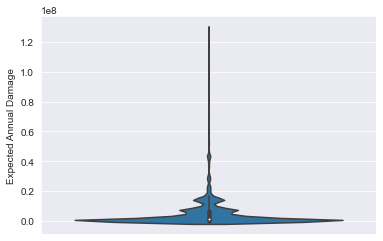

In [12]:
import pandas as pd
import seaborn as sns
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
sns.violinplot(data=data, y='Expected Annual Damage')
plt.show()

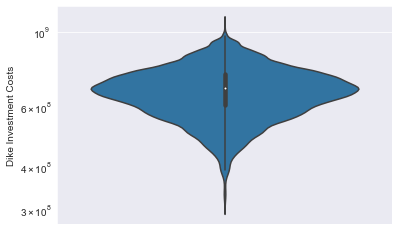

In [13]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Dike Investment Costs')
ax.set_yscale('log')
plt.show()

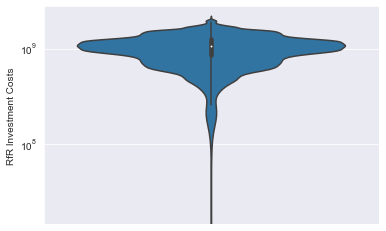

In [14]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='RfR Investment Costs')
ax.set_yscale('log')
plt.show()

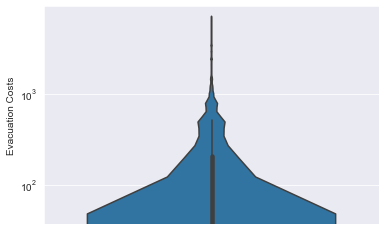

In [15]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Evacuation Costs')
ax.set_yscale('log')
plt.show()

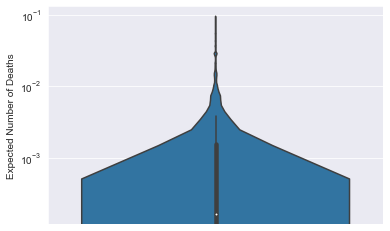

In [16]:
data = pd.DataFrame(outcomes)
data['policy'] = experiments['policy']
ax = sns.violinplot(data=data, y='Expected Number of Deaths')
ax.set_yscale('log')
plt.show()